<a href="https://colab.research.google.com/github/Johndola58/Johndola58/blob/main/ASSESMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MY ASSESSMENT REGRESSION 

Importing library

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import linear_model
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt



Loading the Training dataset

In [32]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/msc_training_dataset.csv")
df=train
df.shape



(3000, 12)

In [33]:
df.head

<bound method NDFrame.head of       room  bathroom  kitchen  french_door  backyard  furnished  green_paint  \
0        3         1        2            1         1          0            1   
1        5         2        2            2         1          0            0   
2        5         2        2            2         1          0            0   
3        1         2        1            2         0          0            0   
4        2         1        2            3         1          1            0   
...    ...       ...      ...          ...       ...        ...          ...   
2995     1         1        2            1         1          0            0   
2996     1         1        2            3         0          1            1   
2997     2         2        1            2         0          0            1   
2998     4         1        1            2         1          1            1   
2999     4         2        1            1         0          0            0   

      sol

In [34]:
df.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


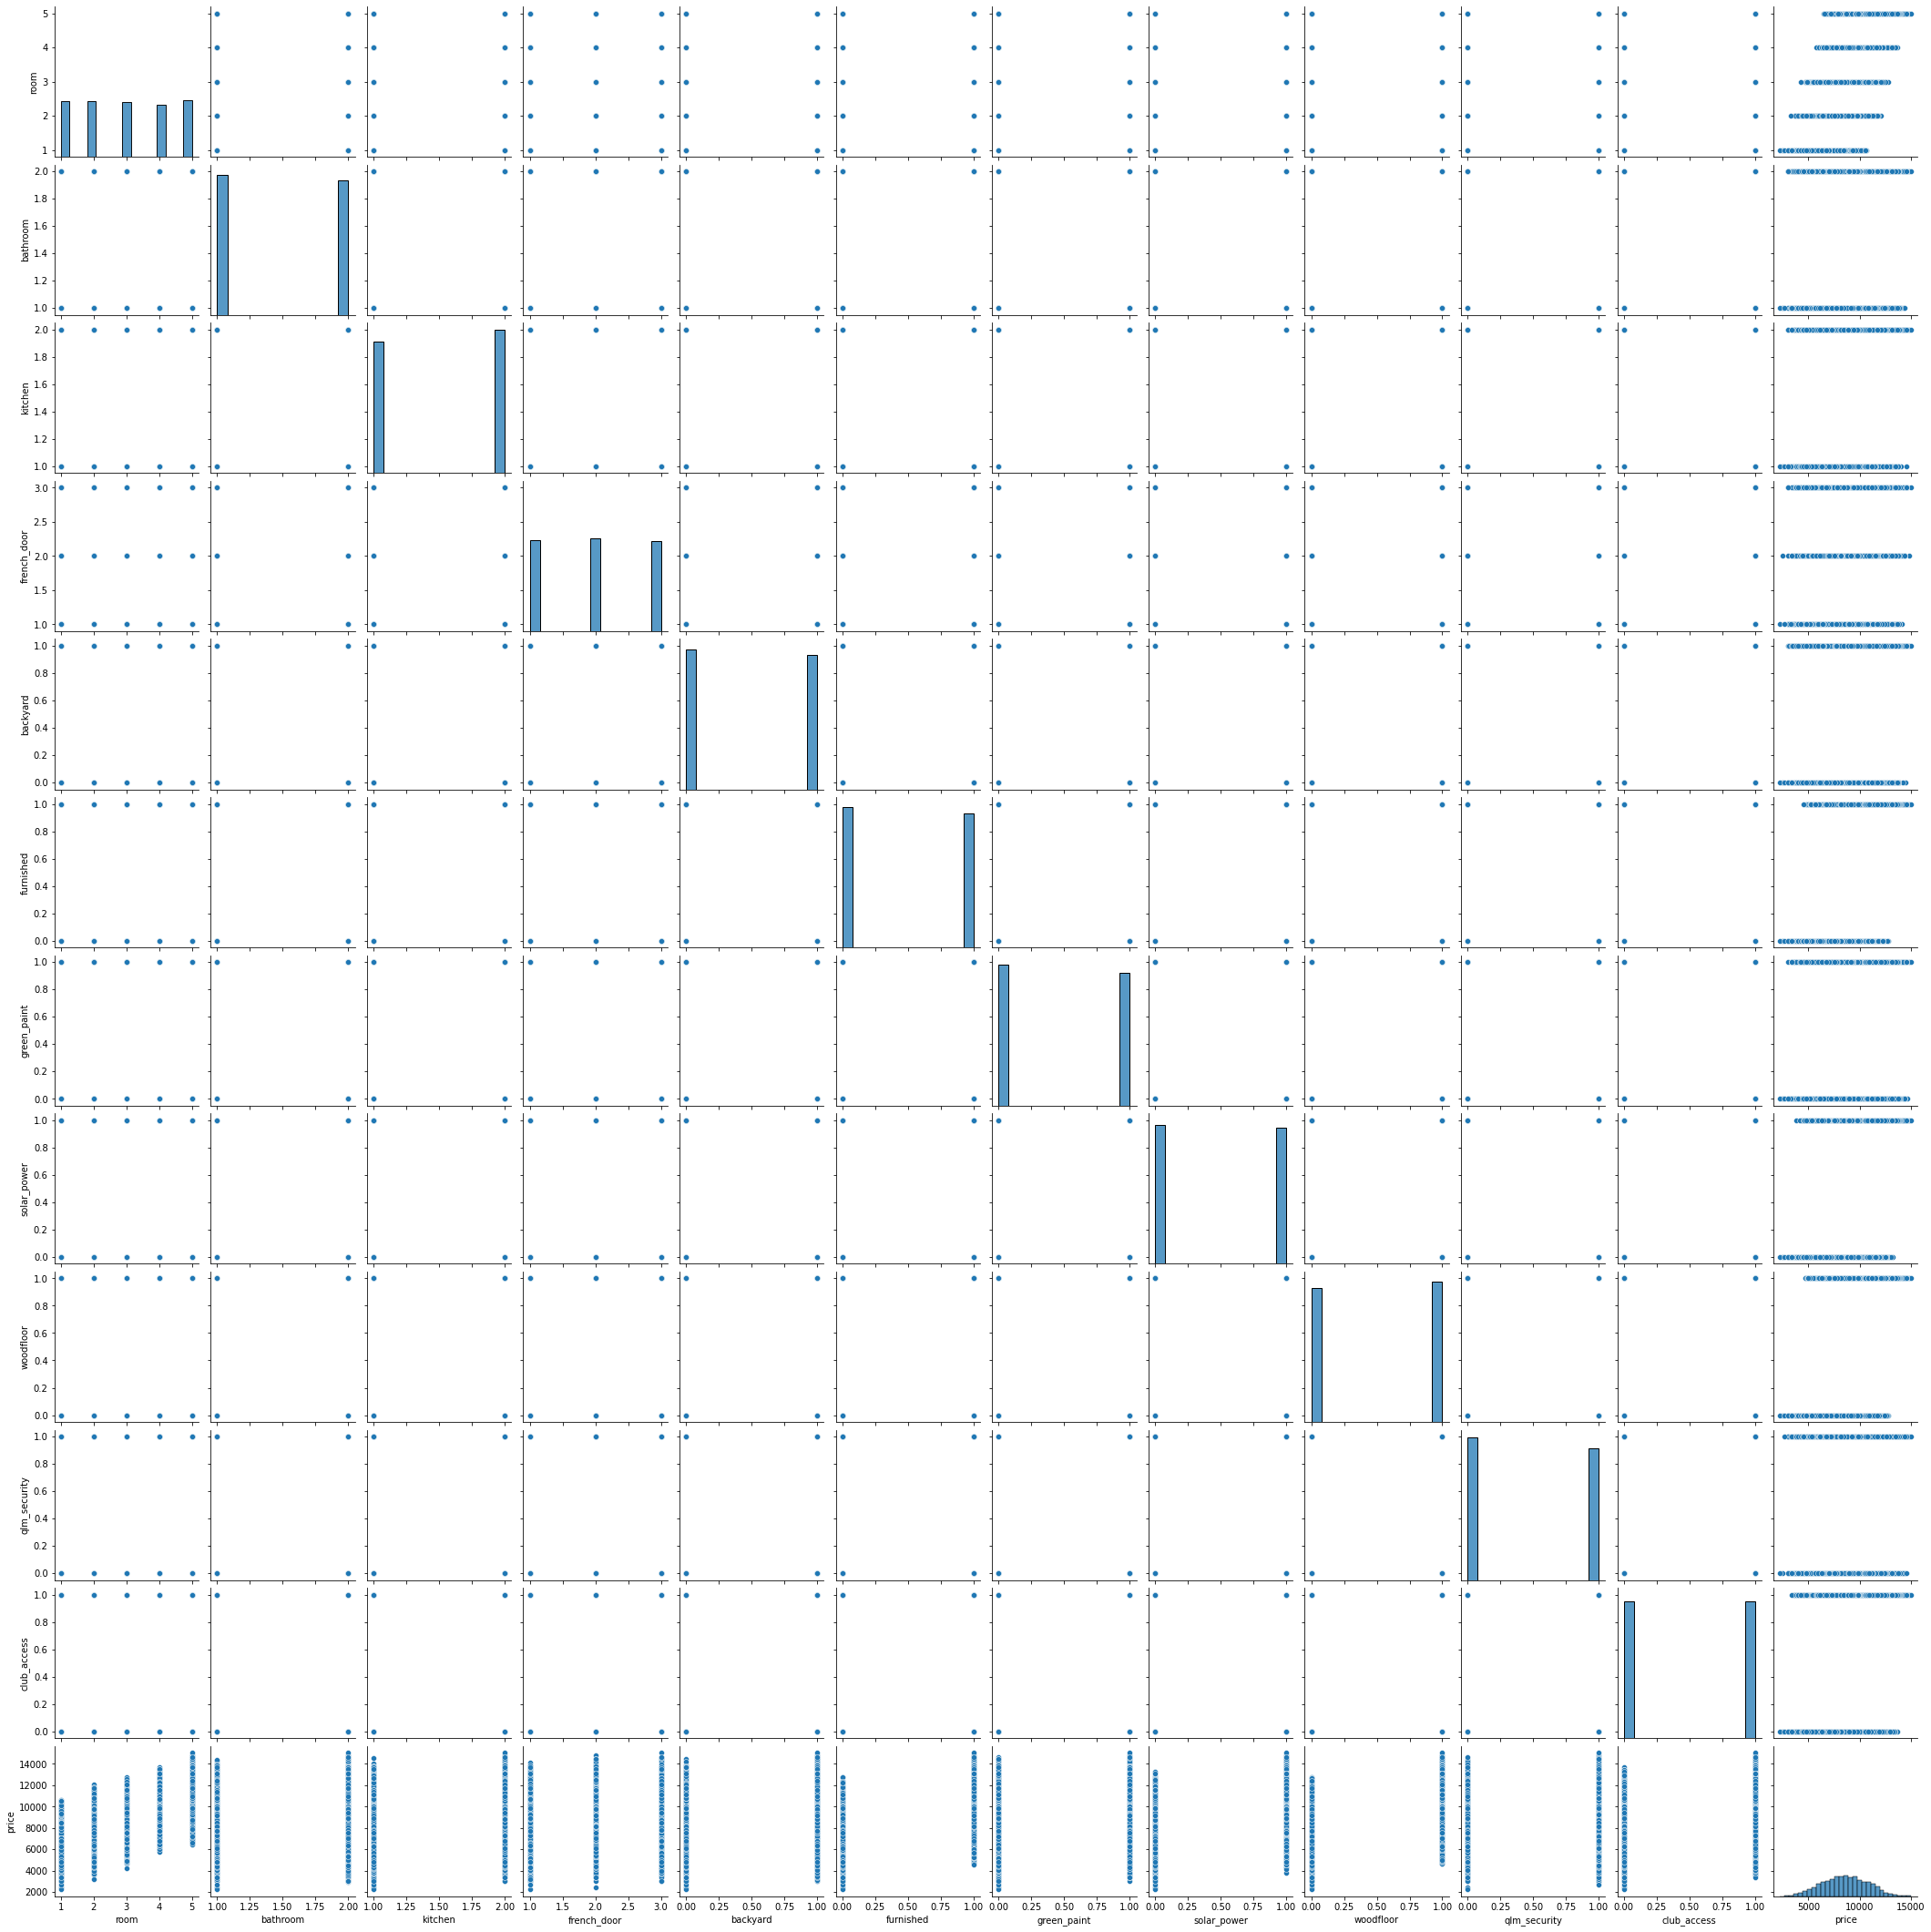

In [35]:
sns.pairplot(df)

Heatmap is to show the correlation 

<Axes: >

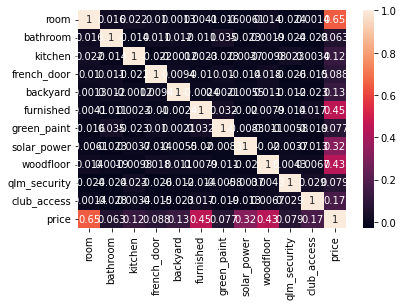

In [36]:
sns.heatmap(df.corr(), annot=True)

In [37]:
X_train, y_train = (df.drop('price', axis=1), df['price'])

In [38]:
print(X_train,y_train)

      room  bathroom  kitchen  french_door  backyard  furnished  green_paint  \
0        3         1        2            1         1          0            1   
1        5         2        2            2         1          0            0   
2        5         2        2            2         1          0            0   
3        1         2        1            2         0          0            0   
4        2         1        2            3         1          1            0   
...    ...       ...      ...          ...       ...        ...          ...   
2995     1         1        2            1         1          0            0   
2996     1         1        2            3         0          1            1   
2997     2         2        1            2         0          0            1   
2998     4         1        1            2         1          1            1   
2999     4         2        1            1         0          0            0   

      solar_power  woodfloor  qlm_secur

In [39]:
df.columns

Index(['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access', 'price'],
      dtype='object')

In [40]:
features = ['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access']

In [41]:
# Fit a multiple linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Preformance Metrix

In [42]:
print("Intercept: \n",lm.intercept_)



Intercept: 
 195.00000000000182


In [43]:
coeff= (regressor.coef_)
coefficients_with_names = list(zip(features, coeff))


In [44]:
# Create a pandas dataframe from the list of coefficients with names
df = pd.DataFrame(coefficients_with_names, columns=['Feature', 'Coefficient'])

# Display the dataframe
print(df)


         Feature  Coefficient
0           room       1000.0
1       bathroom        300.0
2        kitchen        500.0
3    french_door        240.0
4       backyard        560.0
5      furnished       2000.0
6    green_paint        370.0
7    solar_power       1530.0
8      woodfloor       1890.0
9   qlm_security        440.0
10   club_access        730.0


In [46]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/msc_testing_dataset.csv")




In [48]:
test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [66]:
X_test, y_test = (test.drop('price', axis=1), test['price'])

In [67]:
y_pred = lm.predict(X_test)

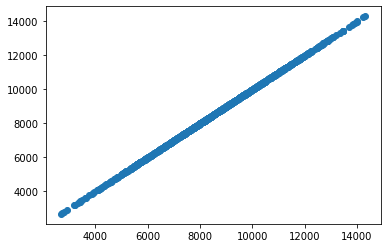

In [68]:
plt.scatter(y_test,y_pred)

In [69]:
print('R-squared: {:.3f}'.format(r2_score(y_test, y_pred)))
print('MSE: {:.3f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {:.3f}'.format(sqrt(mean_squared_error(y_test, y_pred))))
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared: 1.000
MSE: 169.000
RMSE: 13.000
MAE: 13.000


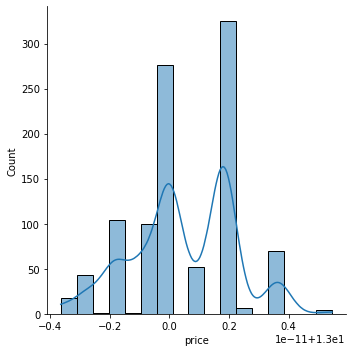

In [70]:
error = y_test - y_pred
sns.displot(error, kde=True)